In [3]:
#http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html
from scipy import misc
import matplotlib.pyplot as plt
import glob
import numpy as np
import pickle

In [4]:
cropsnames=glob.glob("/home/prapan/Documents/images/crops_weed/*")

uint8
1
(400, 400, 3)


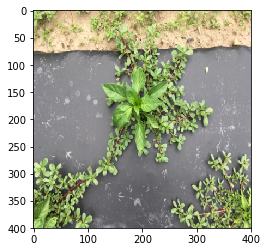

In [39]:
cropspics=[]
xsize=400
ysize=400
for name in cropsnames:
	pic=misc.imread(name)
	cropspics.append(misc.imresize(pic,(xsize,ysize)))

numofpics=len(cropspics)
print(cropspics[0].dtype)
print(numofpics)
print(cropspics[0].shape)

allimages=np.empty(shape=[numofpics,xsize,ysize,3])
for i in range(numofpics):
	allimages[i]=cropspics[i].astype(dtype="float32")
allimages/=255
plt.imshow(allimages[0])
plt.show()

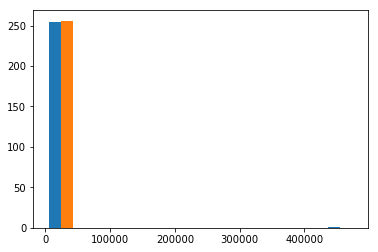

In [40]:
histo = np.histogram(allimages[0], bins=np.arange(0, 256))
plt.hist(histo)
plt.show()

In [41]:
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [42]:
#img = img_as_float(allimages[0][::2, ::2])
img = allimages[0]

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))
print('Compact watershed number of segments: {}'.format(len(np.unique(segments_watershed))))

Felzenszwalb number of segments: 537
SLIC number of segments: 179
Quickshift number of segments: 1269
Compact watershed number of segments: 256


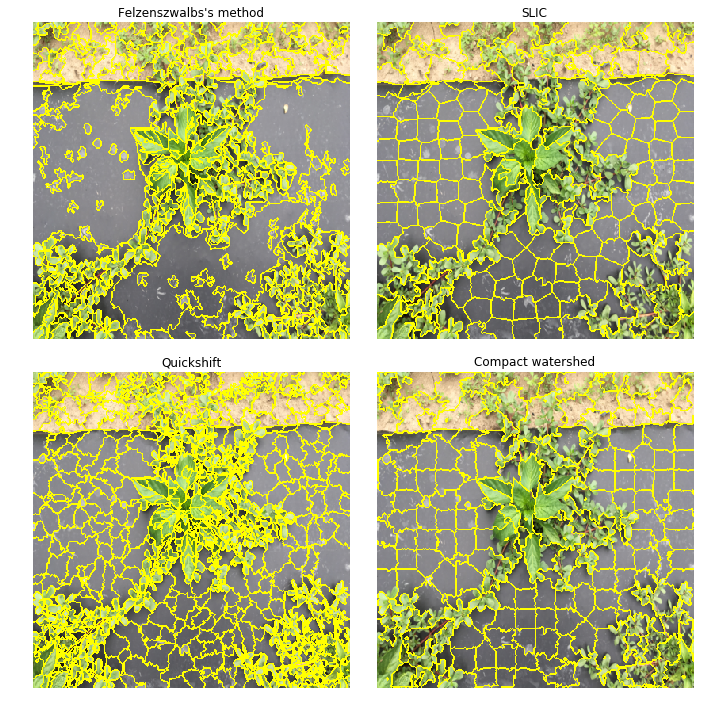

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [44]:
print(segments_fz[0].size)
print(segments_fz[:,:])
np.savetxt("weed_segments_fz.csv",segments_fz[:,:],delimiter=",")

400
[[  0   0   0 ...,  28  28  28]
 [  0   0   0 ...,  28  28  28]
 [  0   0   0 ...,  28  28  28]
 ..., 
 [520 520 520 ..., 519 519 519]
 [520 520 520 ..., 519 519 519]
 [520 520 520 ..., 519 519 519]]
